In [1]:
import os

In [2]:
os.chdir('../../..')

In [3]:
import convokit

In [4]:
corpus = convokit.Corpus(filename=convokit.download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


Let's get the fighting words for r/news and r/the_donald:

In [10]:
fw = convokit.FightingWords(l1_selector=lambda utt: utt.meta['subreddit'] == 'Christianity',
                           l2_selector=lambda utt: utt.meta['subreddit'] == "atheism")

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
fw.threshold = 8

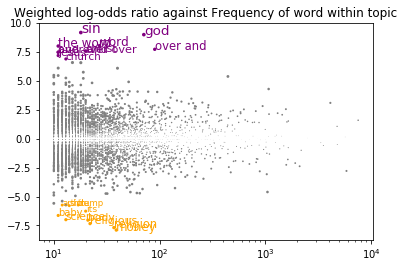

In [17]:
%matplotlib inline
# %matplotlib qt
fw.analyze(corpus)

In [19]:
ngram_zscores = fw.get_ngram_zscores()

In [20]:
# words used in L1
ngram_zscores[-10:]

[('church', 6.878968405224944),
 ('jesus', 7.176733807538942),
 ('over and over', 7.461183180850145),
 ('and over', 7.461183180850145),
 ('christ', 7.571934428874666),
 ('over and', 7.712752904895017),
 ('the word', 7.994271544152006),
 ('word', 8.030532975603759),
 ('god', 8.978852552638312),
 ('sin', 9.160217225471195)]

In [21]:
# words used in L2
ngram_zscores[:10]

[('money', -7.894504398268034),
 ('religion', -7.683359687279551),
 ('religious', -7.340896172397329),
 ('body', -7.043235776669458),
 ('science', -7.00135059049033),
 ('baby', -6.636715709624325),
 ('its', -6.2657875787104205),
 ('shit', -5.791006435023085),
 ('article', -5.738505860642729),
 ('trump', -5.73466544520334)]

In [ ]:
# Words that are more typical of r/Christianity

In [28]:
fw.get_zscore("love")

5.312510805160985

In [29]:
fw.get_zscore("forgive")

1.9936615109801084

In [33]:
fw.get_zscore("repent")

3.0707598917964023

In [49]:
fw.get_zscore("marriage")

2.4678496443875355

In [34]:
# Words that are more typical of r/atheism

In [46]:
fw.get_zscore("government")

-4.24547265642047

In [45]:
fw.get_zscore("state")

-3.7256153360427717

In [47]:
fw.get_zscore("separation")

-1.9591827654633478